In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [222]:
pd.set_option('display.max_columns', 500)


In [223]:
train = pd.read_csv('cancer_reg (1).csv')
train.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [224]:
train.shape

(3047, 34)

In [225]:
train.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [226]:
train[['PctSomeCol18_24', 'PctEmployed16_Over', 'PctPrivateCoverageAlone']]

,PctSomeCol18_24,PctEmployed16_Over,PctPrivateCoverageAlone
0,42.1,51.9,NaN
1,64.0,55.9,53.8
2,NaN,45.9,43.5
3,36.1,48.3,40.3
4,40.0,48.2,43.9
...,...,...,...
3042,NaN,51.7,54.9
3043,35.6,70.1,53.3
3044,33.3,64.8,52.6
3045,NaN,NaN,56.3


/home/rit20/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctSomeCol18_24', ylabel='Density'>

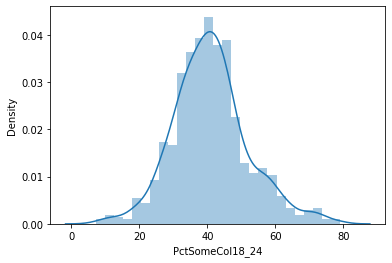

In [227]:
sns.distplot(train['PctSomeCol18_24'])

/home/rit20/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctEmployed16_Over', ylabel='Density'>

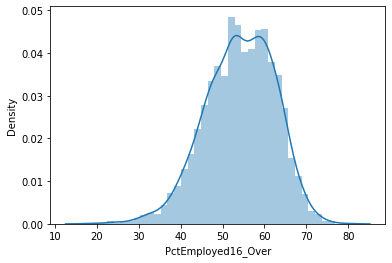

In [228]:
sns.distplot(train['PctEmployed16_Over'])

/home/rit20/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctPrivateCoverageAlone', ylabel='Density'>

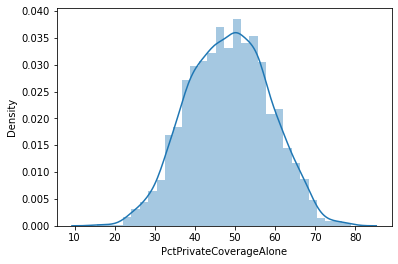

In [229]:
sns.distplot(train['PctPrivateCoverageAlone'])

In [230]:
missing_values = ['PctSomeCol18_24', 'PctEmployed16_Over', 'PctPrivateCoverageAlone']
for i in missing_values:
    train[i].fillna(train[i].mean(), inplace = True)

In [231]:
train.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.100000,6.9,23.2,19.6,51.9,8.0,75.1,48.453774,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.000000,7.5,26.0,22.7,55.9,7.8,70.2,53.800000,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,40.977034,9.5,29.0,16.0,45.9,7.0,63.7,43.500000,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.100000,2.5,31.6,9.3,48.3,12.1,58.4,40.300000,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.000000,2.0,33.4,15.0,48.2,4.8,61.6,43.900000,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [232]:
train.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite            

In [233]:
train['Geography']

0          Kitsap County, Washington
1        Kittitas County, Washington
2       Klickitat County, Washington
3           Lewis County, Washington
4         Lincoln County, Washington
                    ...             
3042        Ellsworth County, Kansas
3043           Finney County, Kansas
3044             Ford County, Kansas
3045         Franklin County, Kansas
3046            Geary County, Kansas
Name: Geography, Length: 3047, dtype: object

In [234]:
train['Geography'].str.split(',', expand = True).add_prefix('b')

,b0,b1
0,Kitsap County,Washington
1,Kittitas County,Washington
2,Klickitat County,Washington
3,Lewis County,Washington
4,Lincoln County,Washington
...,...,...
3042,Ellsworth County,Kansas
3043,Finney County,Kansas
3044,Ford County,Kansas
3045,Franklin County,Kansas


In [235]:
train['binnedInc'].str.replace('(', '').str.replace(']', '').str.split(',', expand = True).add_prefix('a')

<ipython-input-235-5d4c982bb035>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  train['binnedInc'].str.replace('(', '').str.replace(']', '').str.split(',', expand = True).add_prefix('a')


,a0,a1
0,61494.5,125635
1,48021.6,51046.4
2,48021.6,51046.4
3,42724.4,45201
4,48021.6,51046.4
...,...,...
3042,45201,48021.6
3043,48021.6,51046.4
3044,51046.4,54545.6
3045,48021.6,51046.4


In [236]:
train = pd.concat([train, train['Geography'].str.split(',', expand = True).add_prefix('geography'),train['binnedInc'].str.replace('(', '').str.replace(']', '').str.replace('[', '').str.split(',', expand = True).add_prefix('binned') ], axis = 1)

<ipython-input-236-c436899b3c2e>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  train = pd.concat([train, train['Geography'].str.split(',', expand = True).add_prefix('geography'),train['binnedInc'].str.replace('(', '').str.replace(']', '').str.replace('[', '').str.split(',', expand = True).add_prefix('binned') ], axis = 1)


In [237]:
train.drop(['binnedInc', 'Geography'], axis = 1, inplace = True)

In [238]:
train = train.round(3)

In [239]:
train['geography0'].value_counts()

Washington County       30
Jefferson County        25
Franklin County         23
Lincoln County          23
Jackson County          21
                        ..
Llano County             1
Hot Springs County       1
Chelan County            1
Santa Barbara County     1
Niagara County           1
Name: geography0, Length: 1819, dtype: int64

In [240]:
train['geography1'].value_counts()

 Texas                   233
 Georgia                 155
 Virginia                125
 Kentucky                120
 Missouri                115
 Kansas                  102
 Illinois                102
 North Carolina           99
 Iowa                     99
 Tennessee                95
 Indiana                  92
 Minnesota                87
 Ohio                     87
 Michigan                 83
 Mississippi              82
 Nebraska                 80
 Oklahoma                 77
 Arkansas                 75
 Wisconsin                72
 Pennsylvania             67
 Florida                  66
 Louisiana                64
 Alabama                  63
 New York                 62
 Colorado                 60
 South Dakota             59
 California               57
 West Virginia            55
 North Dakota             51
 Montana                  48
 South Carolina           46
 Idaho                    42
 Washington               39
 Oregon                   36
 New Mexico   

In [241]:
#target mean encoding for geography
train['geography0']=train.groupby('geography0')['TARGET_deathRate'].transform('mean')
train['geography1']=train.groupby('geography1')['TARGET_deathRate'].transform('mean')

In [242]:
train['binned0'].astype('float')

0       61494.5
1       48021.6
2       48021.6
3       42724.4
4       48021.6
         ...   
3042    45201.0
3043    48021.6
3044    51046.4
3045    48021.6
3046    40362.7
Name: binned0, Length: 3047, dtype: float64

In [243]:
train.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,geography0,geography1,binned0,binned1
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748,39.3,36.9,41.7,2.54,52.5,11.5,39.5,42.100,6.9,23.2,19.6,51.9,8.0,75.1,48.454,41.6,32.9,14.0,81.781,2.595,4.822,1.843,52.856,6.119,164.900000,166.492308,61494.5,125635
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111,33.0,32.2,33.7,2.34,44.5,6.1,22.4,64.000,7.5,26.0,22.7,55.9,7.8,70.2,53.800,43.6,31.1,15.3,89.229,0.969,2.246,3.741,45.373,4.333,161.300000,166.492308,48021.6,51046.4
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560,45.0,44.0,45.8,2.62,54.2,24.0,36.6,40.977,9.5,29.0,16.0,45.9,7.0,63.7,43.500,34.9,42.1,21.1,90.922,0.740,0.466,2.747,54.445,3.729,174.700000,166.492308,48021.6,51046.4
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637,42.8,42.2,43.4,2.52,52.7,20.2,41.2,36.100,2.5,31.6,9.3,48.3,12.1,58.4,40.300,35.0,45.3,25.0,91.745,0.783,1.161,1.363,51.022,4.604,205.828571,166.492308,42724.4,45201
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000,48.3,47.8,48.9,2.34,57.8,14.9,43.0,40.000,2.0,33.4,15.0,48.2,4.8,61.6,43.900,35.1,44.0,22.7,94.104,0.270,0.666,0.492,54.027,6.797,171.204348,166.492308,48021.6,51046.4


<AxesSubplot:>

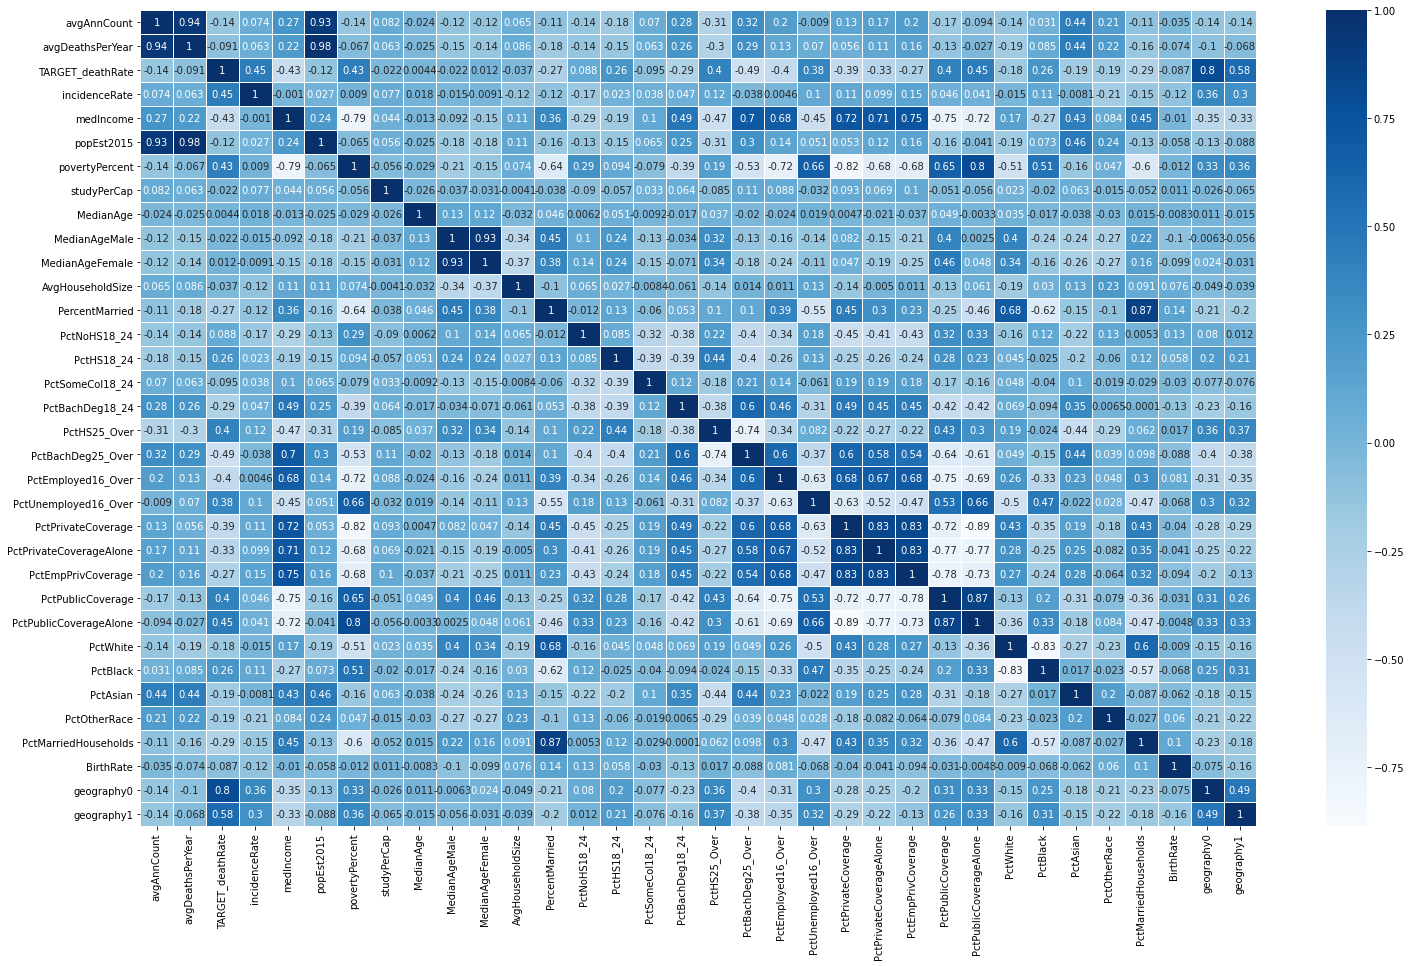

In [244]:
corr = train.corr()
fig, ax = plt.subplots(figsize = (25, 15))
sns.heatmap(corr, cmap = 'Blues', annot = True, ax = ax, linewidths = 0.5)

In [245]:
#removing columns having more than 0.9 correlations -- popEst2015
train.drop(['popEst2015', 'avgDeathsPerYear'], axis = 1, inplace = True)

In [246]:
train.describe()

,avgAnnCount,TARGET_deathRate,incidenceRate,medIncome,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,geography0,geography1
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338565,178.664063,448.268557,47063.281917,16.878175,155.399419,45.272333,39.570725,42.145323,2.479661,51.773679,18.224450,35.002068,40.977009,6.158287,34.804660,13.282015,54.152660,7.852412,64.354939,48.453819,41.196324,36.252642,19.240072,83.645289,9.107976,1.253963,1.983528,51.243871,5.640307,178.664063,178.664063
std,1416.356244,27.751511,54.560730,12040.090836,6.409087,529.628370,45.304480,5.226017,5.292849,0.429177,6.896928,8.093064,9.069722,5.556077,4.529059,7.034924,5.394756,8.104942,3.452371,10.647057,9.018885,9.447687,7.841741,6.113041,16.380020,14.534536,2.610277,3.517708,6.572807,1.985822,22.127730,16.081083
min,6.000000,59.700000,201.300000,22640.000000,3.200000,0.000000,22.300000,22.400000,22.300000,0.022000,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,17.600000,0.400000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199000,0.000000,0.000000,0.000000,22.992000,0.000000,59.700000,135.751852
25%,76.000000,161.200000,420.300000,38882.500000,12.150000,0.000000,37.700000,36.350000,39.100000,2.370000,47.750000,12.800000,29.200000,40.977000,3.100000,30.400000,9.400000,48.900000,5.500000,57.200000,43.100000,34.500000,30.900000,14.850000,77.296500,0.621000,0.254500,0.295000,47.763000,4.521500,167.250000,167.834314
50%,171.000000,178.100000,453.549000,45207.000000,15.900000,0.000000,41.000000,39.600000,42.400000,2.500000,52.400000,17.100000,34.700000,40.977000,5.400000,35.300000,12.300000,54.153000,7.600000,65.100000,48.454000,41.100000,36.300000,18.800000,90.060000,2.248000,0.550000,0.826000,51.670000,5.381000,180.000000,177.907071
75%,518.000000,195.200000,480.850000,52492.000000,20.400000,83.651000,44.000000,42.500000,45.300000,2.630000,56.400000,22.700000,40.700000,40.977000,8.200000,39.650000,16.100000,60.000000,9.700000,72.100000,53.800000,47.700000,41.550000,23.100000,95.451500,10.510000,1.221000,2.178000,55.395000,6.493500,190.500000,189.694783
max,38150.000000,362.800000,1206.900000,125635.000000,47.400000,9762.309000,624.000000,64.700000,65.700000,3.970000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,42.200000,80.100000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,85.948000,42.619000,41.930000,78.075000,21.326000,293.900000,215.315833


In [247]:

#Q1 = train['avgAnnCount'].quantile(0.25)
#Q3 = train['avgAnnCount'].quantile(0.75)
#IQR = Q3 - Q1
#train['avgAnnCount'] = np.where(train['avgAnnCount'] < Q1 - IQR*1.5,train['avgAnnCount'].mean(),train['avgAnnCount'])
#train['avgAnnCount'] = np.where(train['avgAnnCount'] >Q3 + IQR*1.5, train['avgAnnCount'].mean(),train['avgAnnCount'])

In [248]:
train.shape

(3047, 34)

In [249]:
X = train.drop('TARGET_deathRate', axis = 1)
Y = train['TARGET_deathRate']

In [250]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 45)

In [251]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [252]:
y_preds = linreg.predict(x_test)

In [253]:
from sklearn.metrics import mean_squared_error
print('mean squared error',mean_squared_error(y_preds, y_test))
print('rmse',np.sqrt(mean_squared_error(y_preds, y_test)))

mean squared error 217.69239496531816
rmse 14.754402562127623


In [254]:
#hyperparameters--
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train, y_train)

RandomForestRegressor()

In [255]:
y_preds = reg.predict(x_test)
print('mean squared error',mean_squared_error(y_preds, y_test))
print('rmse',np.sqrt(mean_squared_error(y_preds, y_test)))

mean squared error 236.2333029262294
rmse 15.369882983491754


In [256]:
from sklearn.svm import SVR
reg = SVR(C=100.0, epsilon=0.5)
reg.fit(x_train, y_train)
y_preds = reg.predict(x_test)
print('mean squared error',mean_squared_error(y_preds, y_test))
print('rmse',np.sqrt(mean_squared_error(y_preds, y_test)))

mean squared error 614.345233837978
rmse 24.78598865968388
